# TA-Lib technical analysis library to plot Bollinger Bands, RSI, and MACD using Python.

Traders use Bollinger Bands to identify potential trading opportunities in the financial markets.

They’re usually used for identifying overbought and oversold conditions.

People also use them for measuring volatility and getting ahead of trend reversals.

Traders use the Relative Strength Index (RSI) to identify overbought or oversold conditions.

RSI oscillates between 0 and 100. Values above 70 show overbought conditions and values below 30 show oversold conditions.

The Moving Average Convergence Divergence (MACD) is a popular technical analysis tool, too. It’s used by traders to identify trend reversals, momentum shifts, and trend strength.

MACD is based on the difference between two exponential moving averages with different periods.

In [1]:
# Import and setup

# Start by importing Matplotlib for plotting and pandas for data manipulation.

# Then import TA-Lib and the OpenBB SDK.

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from talib import RSI, BBANDS, MACD

from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")
# Use OpenBB to grab some stock data.

data = (
    openbb
    .stocks
    .load("AAPL", start_date="2020-01-01")
    .rename(columns={"Adj Close": "close"})
)

Loading Daily data for AAPL with starting period 2020-01-02.

In [2]:
# Compute the indicator values

# TA-Lib has more than 150 indicators and is one of the most popular libraries around. Using it is simple with Python.

# Create Bollinger Bands
up, mid, low = BBANDS(
    data.close,
    timeperiod=21,
    nbdevup=2,
    nbdevdn=2,
    matype=0
)

# Create RSI
rsi = RSI(data.close, timeperiod=14)

# Create MACD
macd, macdsignal, macdhist = MACD(
    data.close,
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

# Depending on the indicator, the function takes different values. BBANDS takes the closing price, the lookback window, and the number of standard deviations. RSI just takes the lookback window, and MACD takes the fast, slow, and signal periods.

In [3]:
# Plot the indicators

# Use pandas to put all the data together and Matplotlib to plot it. First the data.

macd = pd.DataFrame(
    {
        "MACD": macd,
        "MACD Signal": macdsignal,
        "MACD History": macdhist,
    }
)

data = pd.DataFrame(
    {
        "AAPL": data.close,
        "BB Up": up,
        "BB Mid": mid,
        "BB down": low,
        "RSI": rsi,
    }
)
# Create two DataFrames: the first for the MACD signals, the second for the remaining indicators.

# Then plot them.

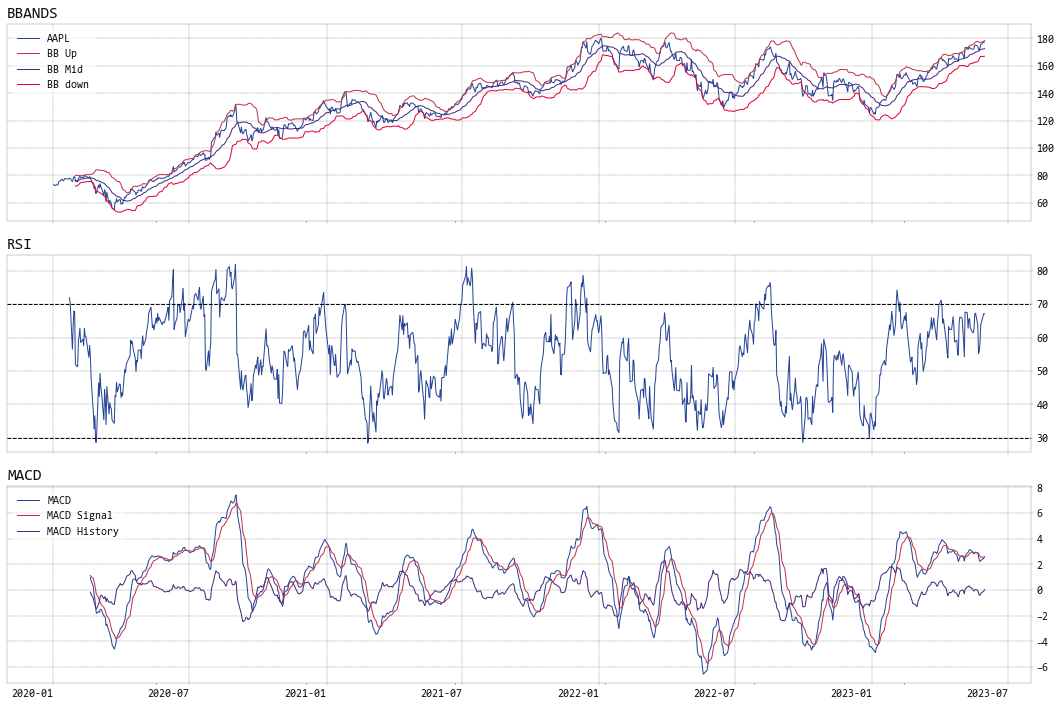

In [4]:
fig, axes = plt.subplots(
    nrows=3,
    figsize=(15, 10),
    sharex=True
)

data.drop(["RSI"], axis=1).plot(
    ax=axes[0],
    lw=1,
    title="BBANDS"
)
data["RSI"].plot(
    ax=axes[1],
    lw=1,
    title="RSI"
)
axes[1].axhline(70, lw=1, ls="--", c="k")
axes[1].axhline(30, lw=1, ls="--", c="k")
macd.plot(
    ax=axes[2],
    lw=1,
    title="MACD",
    rot=0
)
axes[2].set_xlabel("")
fig.tight_layout()